In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


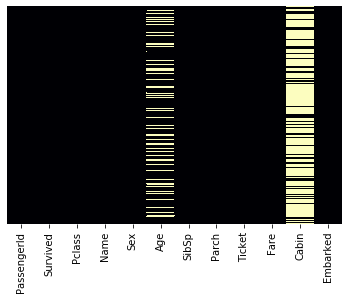

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [9]:
sns.set_style('whitegrid')

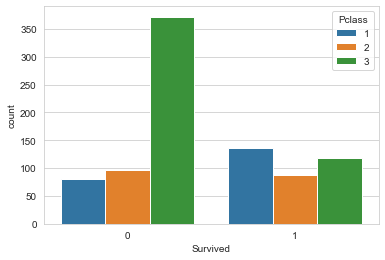

In [13]:
sns.countplot(x='Survived',data=train,hue='Pclass')

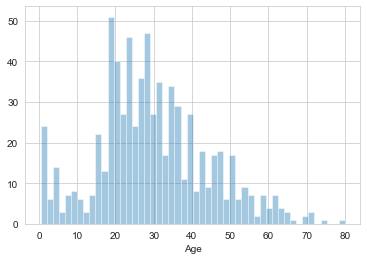

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,bins=50)

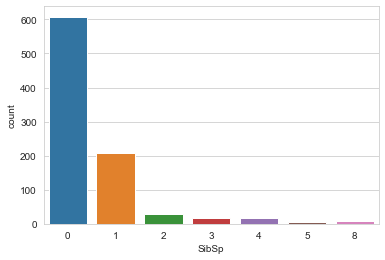

In [18]:
sns.countplot(x='SibSp',data=train)

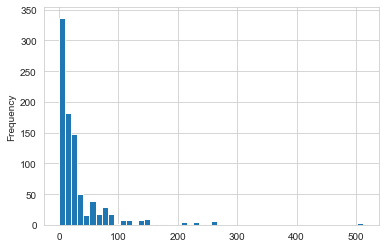

In [20]:
train['Fare'].plot.hist(bins=50)

In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [26]:
train['Fare'].iplot(kind='hist',bins=50)

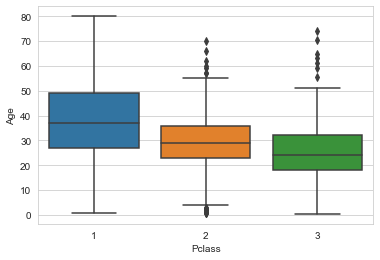

In [27]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

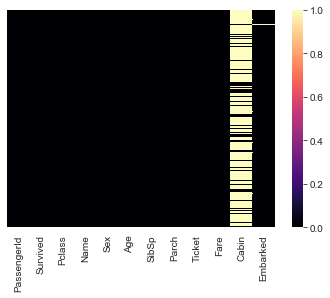

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='magma')

In [36]:
train.drop('Cabin',axis=1,inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
train.dropna(inplace=True)

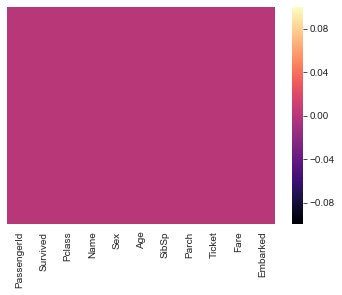

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='magma')

In [44]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [42]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [45]:
train = pd.concat([train,sex,embark],axis=1)

In [51]:
train.drop('PassengerId',axis=1,inplace=True)

In [56]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [149]:
x = train.drop('Survived',axis=1) 
y = train['Survived']

In [150]:
from sklearn.model_selection import train_test_split 

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
logmodel = LogisticRegression()

In [154]:
logmodel.fit(x_train,y_train)

C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
predictions = logmodel.predict(x_test)

In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)